<a href="https://colab.research.google.com/github/meshramkajal/Medical-Insurance-Cost-Prediction-using-Machine-Learning-with-Python/blob/main/Medical_Insurance_Cost_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [3]:
 # loading the data from csv file to a pandas DataFrame
 insurance_dataset = pd.read_csv('/content/insurance.csv')

In [5]:
#first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# number of rows and column
insurance_dataset.shape

(1338, 7)

In [8]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

-sex

-Smoker

-Region


In [9]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [10]:
# Stistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-12-95301568f6f9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


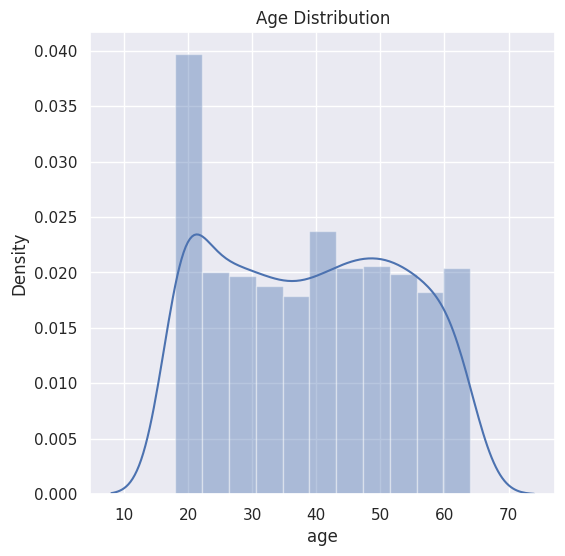

In [12]:
# distibution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

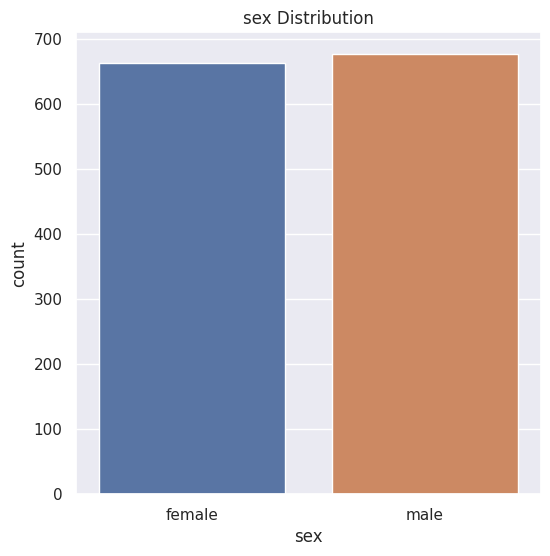

In [13]:
# Gender Column
plt.figure(figsize= (6,6))
sns.countplot(x='sex', data= insurance_dataset)
plt.title('sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-15-c6d8e9f2fe93>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


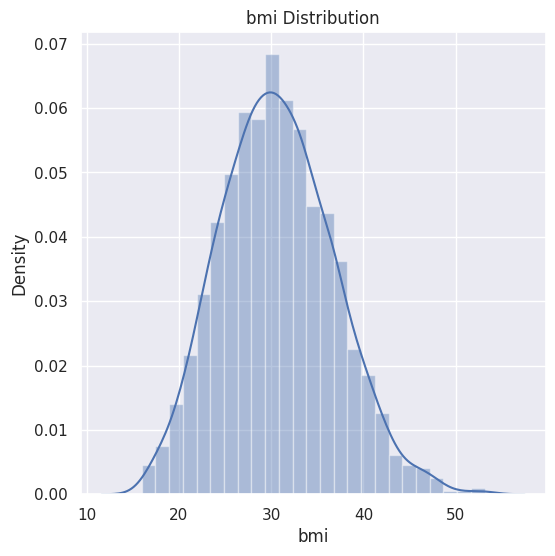

In [15]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

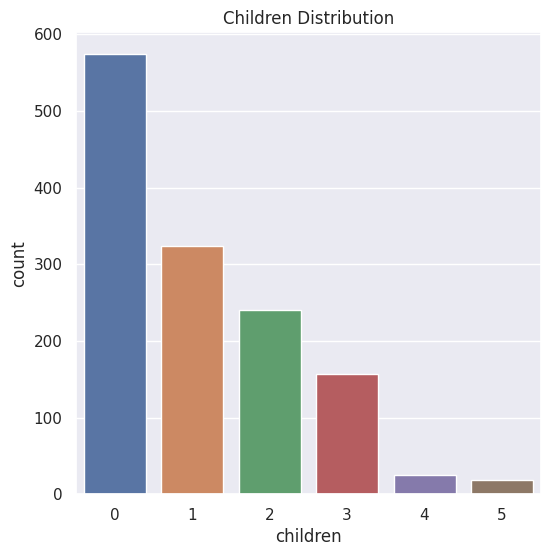

In [16]:
# children Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data= insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [17]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

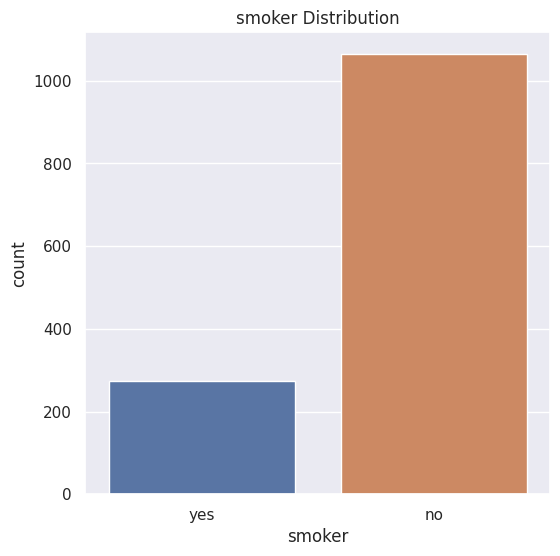

In [18]:
# Smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data= insurance_dataset)
plt.title('smoker Distribution')
plt.show()

In [19]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

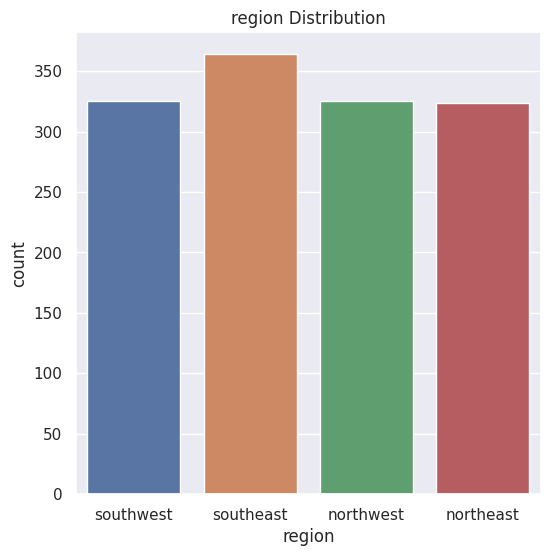

In [23]:
# Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region', data= insurance_dataset)
plt.title('region Distribution')
plt.show()

In [22]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-25-a6b2e8b10f1c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


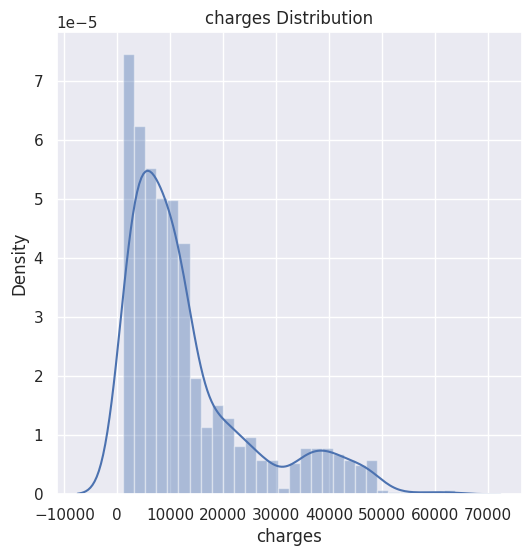

In [25]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [26]:
insurance_dataset['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

Data Pre-processing

Encoding the categorical features

In [55]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0 , 'female':1}}, inplace= True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace= True)

Splitting the Features and Target

In [30]:
X = insurance_dataset.drop(columns = 'charges',  axis=1)
Y = insurance_dataset['charges']

In [32]:
print(X)

      age  sex     bmi  children  smoker     region
0      19    1  27.900         0       0  southwest
1      18    0  33.770         1       1  southeast
2      28    0  33.000         3       1  southeast
3      33    0  22.705         0       1  northwest
4      32    0  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    0  30.970         3       1  northwest
1334   18    1  31.920         0       1  northeast
1335   18    1  36.850         0       1  southeast
1336   21    1  25.800         0       1  southwest
1337   61    1  29.070         0       0  northwest

[1338 rows x 6 columns]


In [33]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Spliiting data into Training data & Testing Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression Model

In [76]:
# Convert feature/column names to strings
X.columns = X.columns.astype(str)

# Apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train = X_encoded[:1070]  # Adjust the number of samples as per your dataset
y_train = y[:1070] 

# Create an instance of the regression model (e.g., Linear Regression)
regressor = LinearRegression()

# Fit the regression model using the encoded features and target variable
regressor.fit(X_train, Y_train)


LinearRegression()

Model Evaluation

In [79]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [81]:
# R squarad value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squarad value:' , r2_train)

R squarad value: 1.0


In [82]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [83]:
# R squarad value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squarad value:' , r2_test)

R squarad value: 1.0


Build a Predictive system

In [89]:


# Assuming 'input_data' is a list or array containing the input data for prediction
input_data = [19, 1, 27.900, 0, 0, 1]

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Apply one-hot encoding to categorical variables
input_encoded = pd.get_dummies(input_df)

# Ensure that the input data has the same columns as the training data
input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the trained regression model
prediction = regressor.predict(input_encoded)

print(prediction)

print('The insurance cost is USD is USD ', prediction[0])


[0.5]
The insurance cost is USD is USD  0.5000000000000024
